In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [2]:
df = pd.read_csv('./fer2013.csv')

In [3]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:
set(df['Usage'].values[:])

{'PrivateTest', 'PublicTest', 'Training'}

In [5]:
df['Usage'].replace('PrivateTest', 'Validation', inplace=True)
df['Usage'].replace('PublicTest', 'Test', inplace=True)

In [6]:
set(df['Usage'].values[:])

{'Test', 'Training', 'Validation'}

In [7]:
def formatPixelData(data):
  return np.vstack([np.fromstring(x, dtype=int, sep=' ').reshape(-1,48,48,1) for x in data])

In [8]:
x_train = formatPixelData(df.loc[df['Usage'] == 'Training', 'pixels'])
x_test = formatPixelData(df.loc[df['Usage'] == 'Validation', 'pixels'])
y_train = np.array(df.loc[df['Usage'] == 'Training', 'emotion'])
y_test = np.array(df.loc[df['Usage'] == 'Validation', 'emotion'])
print("x_train.shape:", x_train.shape)
print("x_test.shape:", x_test.shape)
print("y_train.shape", y_train.shape)
print("y_test.shape", y_test.shape)

x_train.shape: (28709, 48, 48, 1)
x_test.shape: (3589, 48, 48, 1)
y_train.shape (28709,)
y_test.shape (3589,)


In [9]:
K = len(set(y_train))
print("number of classes:", K)

number of classes: 7


In [10]:
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
898/898 [==============================] - 12s 11ms/step - loss: 1.7588 - accuracy: 0.3789 - val_loss: 1.4468 - val_accuracy: 0.4277
Epoch 2/50
898/898 [==============================] - 9s 10ms/step - loss: 1.3176 - accuracy: 0.4912 - val_loss: 1.4618 - val_accuracy: 0.4400
Epoch 3/50
898/898 [==============================] - 9s 10ms/step - loss: 1.2130 - accuracy: 0.5354 - val_loss: 1.1990 - val_accuracy: 0.5425
Epoch 4/50
898/898 [==============================] - 9s 10ms/step - loss: 1.1317 - accuracy: 0.5724 - val_loss: 1.9916 - val_accuracy: 0.4171
Epoch 5/50
898/898 [==============================] - 8s 9ms/step - loss: 1.0603 - accuracy: 0.6017 - val_loss: 1.1046 - val_accuracy: 0.5893
Epoch 6/50
898/898 [==============================] - 9s 10ms/step - loss: 0.9900 - accuracy: 0.6273 - val_loss: 1.1214 - val_accuracy: 0.5935
Epoch 7/50
898/898 [==============================] - 9s 10ms/step - loss: 0.8935 - accuracy: 0.6660 - val_loss: 1.1458 - val_accuracy: 0.5754

In [30]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
897/897 [==============================] - 9s 10ms/step - loss: 1.2534 - accuracy: 0.5470 - val_loss: 1.0447 - val_accuracy: 0.6199
Epoch 2/50
897/897 [==============================] - 9s 10ms/step - loss: 1.1052 - accuracy: 0.5943 - val_loss: 0.9867 - val_accuracy: 0.6342
Epoch 3/50
897/897 [==============================] - 9s 10ms/step - loss: 1.0495 - accuracy: 0.6134 - val_loss: 0.9892 - val_accuracy: 0.6305
Epoch 4/50
897/897 [==============================] - 9s 10ms/step - loss: 1.0135 - accuracy: 0.6265 - val_loss: 0.9751 - val_accuracy: 0.6411
Epoch 5/50
897/897 [==============================] - 9s 10ms/step - loss: 0.9849 - accuracy: 0.6384 - val_loss: 0.9598 - val_accuracy: 0.6447
Epoch 6/50
897/897 [==============================] - 9s 10ms/step - loss: 0.9605 - accuracy: 0.6463 - val_loss: 0.9442 - val_accuracy: 0.6567
Epoch 7/50
897/897 [==============================] - 9s 10ms/step - loss: 0.9377 - accuracy: 0.6537 - val_loss: 0.9587 - val_accuracy: 0.6514

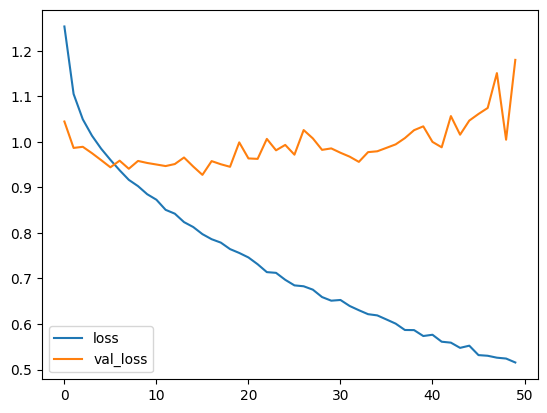

In [32]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

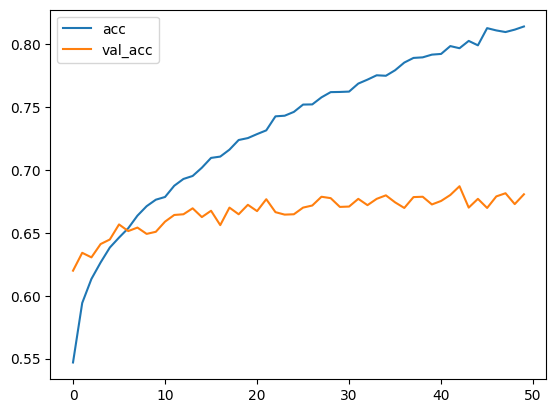

In [33]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [34]:
emotion_dict = {0: 'Angry', 1:'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6:'Neutral'}

113/113 [==============================] - 0s 3ms/step
Confusion matrix, without normalization
[[295   2  52  15  53  14  60]
 [ 12  35   0   2   4   1   1]
 [ 71   5 252  13  80  47  60]
 [ 15   0  10 771  20  16  47]
 [ 54   1  63  27 290   8 151]
 [  9   1  37  17   6 337   9]
 [ 27   0  25  34  67  10 463]]


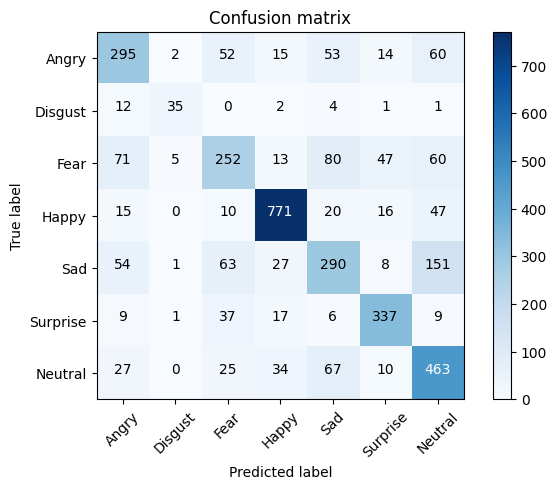

In [35]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, emotion_dict.values())

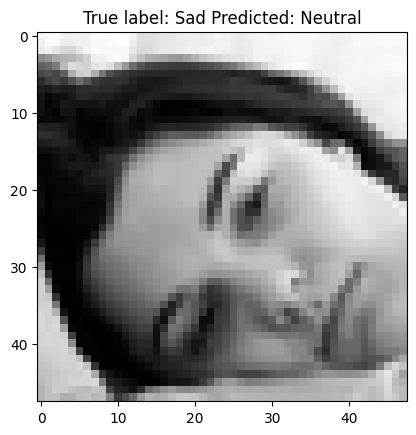

In [41]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (emotion_dict[y_test[i]], emotion_dict[p_test[i]]));

In [37]:
p_images = formatPixelData(df.loc[df['Usage'] == 'Test', 'pixels'])
p_emotion = np.array(df.loc[df['Usage'] == 'Validation', 'emotion'])

In [38]:
test_loss, test_acc = model.evaluate(p_images, p_emotion)
print('test accuracy:', test_acc)

113/113 [==============================] - 0s 4ms/step - loss: 7.1694 - accuracy: 0.1700
test accuracy: 0.1699637770652771


In [39]:
pred_test_labels = model.predict(p_images)

113/113 [==============================] - 0s 3ms/step
